In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.image as mpimg

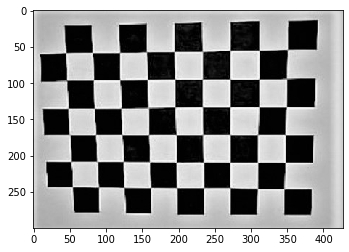

In [5]:
img = mpimg.imread(r'tyi.jpg')
plt.imshow(img)

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [7]:
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [8]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
ret, corners = cv2.findChessboardCorners(img_gray, (8,6), None)

In [11]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)

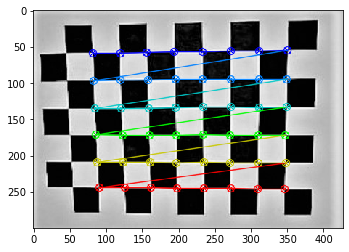

In [12]:
img2 = cv2.drawChessboardCorners(img, (8,6), corners, ret)
plt.imshow(img2)

In [13]:
import pickle

In [14]:
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )

In [15]:
objpoints = dist_pickle["objpoints"]

In [16]:
imgpoints = dist_pickle["imgpoints"]

In [17]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [18]:
undistorted = cal_undistort(img, objpoints, imgpoints)

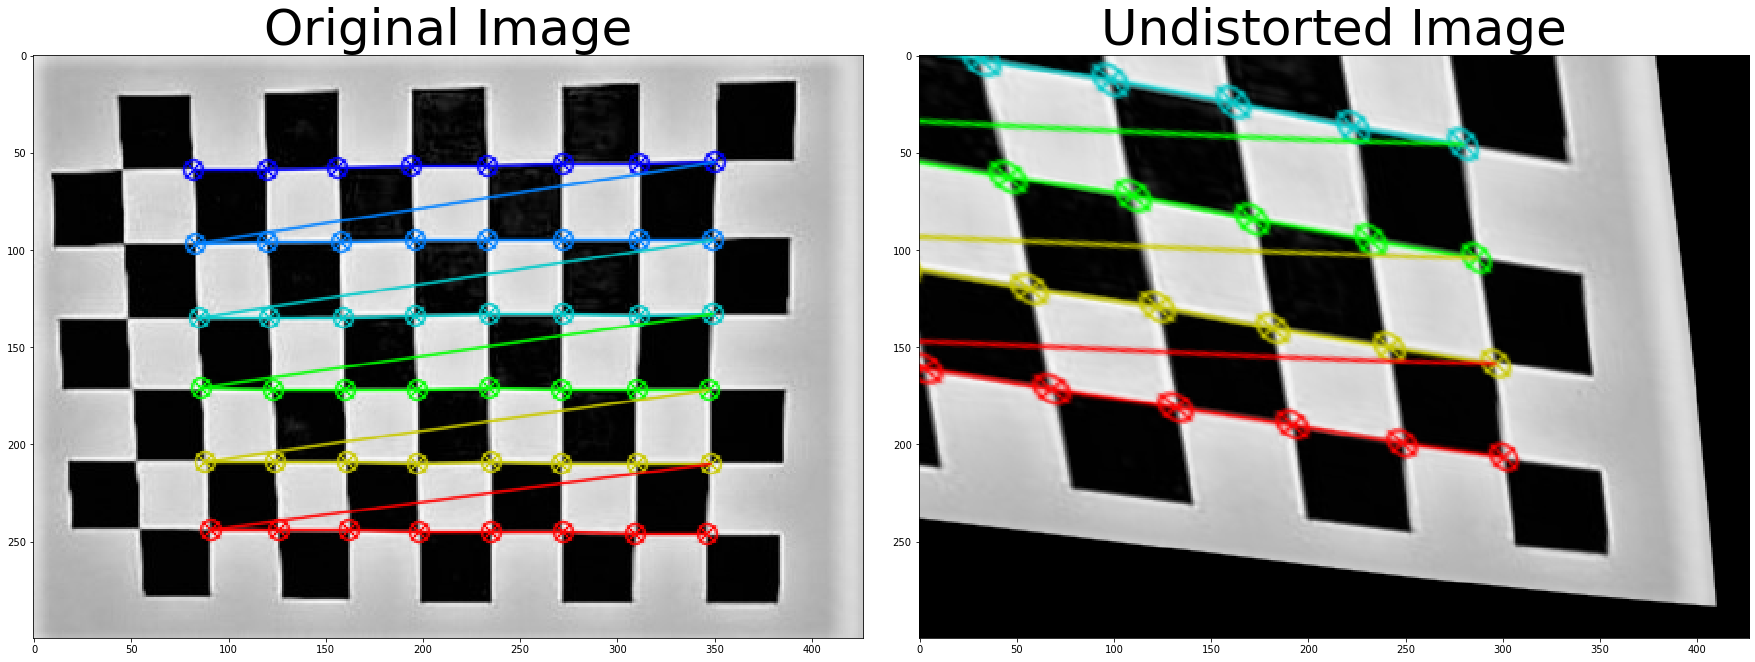

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_gray.shape[::-1], None, None)

In [21]:
print(mtx)

[[1.65822704e+03 0.00000000e+00 3.73248238e+02]
 [0.00000000e+00 4.04647812e+03 3.21552551e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [22]:
print(dist)

[[-2.34577852 -2.81009191  0.09413292  0.35942763  9.06741312]]


In [23]:
print(rvecs)

[array([[ 1.00182504],
       [ 0.07833439],
       [-0.09223505]]), array([[ 1.04207201],
       [ 0.11018482],
       [-0.12152037]]), array([[ 1.06767481],
       [ 0.10048519],
       [-0.10834771]]), array([[ 1.06783033],
       [ 0.07364278],
       [-0.08528   ]]), array([[ 1.03528435],
       [ 0.15451634],
       [-0.11942384]]), array([[ 1.04964826],
       [ 0.10988102],
       [-0.06914941]]), array([[ 1.01595074],
       [ 0.07437731],
       [-0.2245345 ]]), array([[ 1.14353943],
       [ 0.06434744],
       [-0.09987911]]), array([[ 1.10947797],
       [ 0.08260396],
       [-0.10751891]]), array([[ 1.0643664 ],
       [ 0.09195557],
       [-0.1017812 ]]), array([[ 0.98658142],
       [ 0.10177425],
       [-0.12414943]]), array([[ 0.97261475],
       [ 0.2017266 ],
       [-0.22740259]]), array([[ 1.06748711],
       [ 0.01478464],
       [-0.03887804]]), array([[ 1.08197642],
       [ 0.13978447],
       [-0.08957846]]), array([[ 1.07422006],
       [ 0.10260078],
   

In [24]:
print(tvecs)

[array([[ 1.20003233],
       [-0.59194723],
       [19.45455024]]), array([[ 1.35762606],
       [-0.3216161 ],
       [23.86433277]]), array([[-1.66895932],
       [-0.58010001],
       [12.19259812]]), array([[-1.57941429],
       [-0.35538824],
       [12.43769934]]), array([[-2.17137823],
       [-0.5064681 ],
       [12.98228775]]), array([[-2.54963873],
       [-0.25962306],
       [13.67776577]]), array([[-0.21256921],
       [-0.05041958],
       [16.22342795]]), array([[-1.39823263],
       [ 0.12498294],
       [11.76177681]]), array([[-1.45831562],
       [-0.1097594 ],
       [10.779591  ]]), array([[ 0.10566084],
       [-0.11722364],
       [24.89484672]]), array([[ 4.3671782 ],
       [-0.17433794],
       [34.35270149]]), array([[ 5.18503313],
       [-0.48063618],
       [20.9016785 ]]), array([[-3.95814074],
       [-0.22692857],
       [15.20396863]]), array([[-3.08676553],
       [-0.18954551],
       [12.32531606]]), array([[-2.86241963],
       [ 0.09028463],
   

In [25]:
print(ret)

24.11177983494952
